In [1]:
# define rooms and items

import winsound
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


couch = {
    "name": "couch",
    "type": "map",
}

door_a = {
    "name": "door a" ,
    "type": "door",
}

key_a = {
    "name": "key for door a",
    "type": "key",
    "target": door_a,
}

piano = {
    "name": "piano",
    "type": "furniture",
}

game_room = {
    "name": "game room",
    "type": "room",
}

outside = {
  "name": "outside"
}


glass_wine = {
    "name": "glass wine",
    "type": "furniture",
}

#define bedroom1
queen_bed = {
    "name": "queen bed" ,
    "type": "furniture",
}

door_b = {
    "name" :  "door b" ,
         "type": "door",
}

door_c = {
    "name":  "door c" ,
         "type" : "door",
}

key_b = {
    "name": "key for door b",
    "type": "key",
    "target": door_b,
}

bedroom_1 = {
    "name": "bedroom 1",
    "type": "room",
}


#define bedroom2

double_bed = {
    "name": "double bed" ,
    "type": "furniture",
}

dresser = {
    "name": "dresser",
    "type": "furniture",
}

key_c = {
    "name": "key for door c",
    "type": "key",
    "target": door_c,
}

door_d = {"name": "door d" ,
         "type" : "door",
}


key_d = {
    "name": "key for door d",
    "type": "key",
    "target": door_d,
}

bedroom_2 = {
    "name": "bedroom 2" ,
    "type": "room",
}

#define living room

dining_table = {
    "name": "dining table" ,
    "type": "poison",
}


living_room = {
    "name": "living room",
    "type": "furniture",
    
}



#define Toilet 




all_rooms = [game_room, bedroom_1, bedroom_2, living_room, outside]  #added all the rooms

all_doors = [door_a, door_b, door_c, door_d]   #added all the doors

# define which items/rooms are related

object_relations = {
    "game room": [couch, piano, door_a],
    "piano": [key_a],
    "outside": [door_d],                                                #changed outside with door_d = target room
    "door a": [game_room, bedroom_1],                                    #changed outside with bedroom1?                        
    "bedroom 1" : [queen_bed, door_a, door_b, door_c],                 #adding other items/rooms
    "queen bed" : [key_b],
    "door b" : [bedroom_1, bedroom_2],
    "door c" : [bedroom_1, living_room] ,                                             #bedroom2                          
    "bedroom 2" : [double_bed, dresser, door_b],
    "double bed" : [key_c],
    "dresser" : [key_d],
     "living room" : [dining_table, door_d, door_c] ,                                                                     #"door b" : [bedroom_1],                                              #outside??? door?
     "door d" : [outside] ,                                                 #living room
    
    
    
    
}

# define game state. Do not directly change this dict. 
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This 
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": game_room, 
    "keys_collected": [],
    "target_room": outside
}

In [2]:
def sound():
    return winsound.PlaySound("Profondo", winsound.SND_ASYNC)

def sound_off():
    return winsound.PlaySound(None, winsound.SND_PURGE)

    

def linebreak():
    """
    Print a line break
    """
    print("\n\n")

def start_game():
    """
    Start the game
    """
    print("\033[1m" + "You wake up on a couch and find yourself in a creepy house with no windows which you have never been to before. It seems a Dream. You feel dizzy and achy. Something weird happened to you.You don't remember why you are here and what had happened before. There is a piece of paper next to you: 'you have been poisoned, find the antidote'. It is time to go. NOW!" + "\033[0m")
    #sound()
    play_room(game_state["current_room"])   #######"current_room"
    
def wine():    #glass of wine function: if you drink game restart. if no continue(inserting image and stop sound)
    intended_action = input("You find a glass of wine with the following statement: This is the antidote. Do you want to drink it? 'yes' or 'no'")
    if intended_action == "yes":
        
        %pylab inline
        img = mpimg.imread('died.jpeg')
        imgplot = plt.imshow(img)
        plt.show()
        print("\033[1m" + "YOU DIED STUPID. PLEASE TRY AGAIN" + "\033[0m")
        sound_off()
        
        global INIT_GAME_STATE
        #restart()
        game_state = INIT_GAME_STATE.copy()  ##### HOW TO RESTART GAME????
        #start_game()
        print("\033[1m" + "You wake up on a couch and find yourself in a creepy house with no windows which you have never been to before. It seems a Dream. You feel dizzy and achy. Something weird happened to you.You don't remember why you are here and what had happened before. There is a piece of paper next to you: 'you have been poisoned, find the antidote'. It is time to go. NOW!" + "\033[0m")

        play_room(game_state["current_room"])
        
        
    elif intended_action == "no":    # can be done better instead of print re-entering in the right loop
        print("You are now in living room")
    else:
        print("Not sure what you mean. Do you want to drink it? 'yes' or 'no'")
        
def restart():
    while 1:
        os.system("sample-code-Copy2.ipynb")
        print ("Restarting...")
        exit()  
            
def maps():
    print("\033[1m" + "You find a map!" + "\033[0m")
    %pylab inline
    img = mpimg.imread('mappa.jpg')
    imgplot = plt.imshow(img)
    plt.show()    
         
      
    
    
def play_room(room):
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either 
    explore (list all items in this room) or examine an item found here.
    """
    game_state["current_room"] = room
    if(game_state["current_room"] == game_state["target_room"]):
        print("\033[1m" + "Congrats! You escaped the room! You have found the antidote. You woke up totally sweat: It was just a dream" + "\033[0m")
        %pylab inline
        img = mpimg.imread('end.jfif')
        imgplot = plt.imshow(img)
        plt.show()
        sound_off()
        
    
        
    else:
        print("You are now in " + room["name"])
        
        intended_action = input("What would you like to do? Type 'explore' or 'examine'?").strip()
        if intended_action == "explore":
            explore_room(room)
            play_room(room)
        elif intended_action == "examine":
            examine_item(input("What would you like to examine?").strip())
        else:
            print("Not sure what you mean. Type 'explore' or 'examine'.")
            play_room(room)
        linebreak()

def explore_room(room):
    """
    Explore a room. List all items belonging to this room.
    """
    items = [i["name"] for i in object_relations[room["name"]]]
    print("You explore the room. This is " + room["name"] + ". You find " + ", ".join(items))

def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been 
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    current_room = game_state["current_room"]
    next_room = ""
    output = None
    
    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "You examine " + item_name + ". "
            if(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "You unlock it with a key you have."
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
            
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + item_found["name"] + "."
                else:
                    output += "There isn't anything interesting about it."
            if (item["type"] == 'poison'):
                wine()   
            if (item["type"] == 'map'): 
                maps()
                
            print(output)
            break
            
    
        
    if(output is None):
        print("The item you requested is not found in the current room.")
    
    if(next_room and input("Do you want to go to the next room? Ener 'yes' or 'no'").strip() == 'yes'):
        play_room(next_room)
    else:
        play_room(current_room)
    
    
   
   
    

You wake up on a couch and find yourself in a creepy house with no windows which you have never been to before. It seems a Dream. You feel dizzy and achy. Something weird happened to you.You don't remember why you are here and what had happened before. There is a piece of paper next to you: 'you have been poisoned, find the antidote'. It is time to go. NOW!
You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?piano
You examine piano. You find key for door a.
You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door a
You examine door a. You unlock it with a key you have.
Do you want to go to the next room? Ener 'yes' or 'no'yes
You are now in bedroom 1
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?queen bed
You examine queen bed. You find key for door b.
You are now in bedroom 1
What would you like to do? Typ

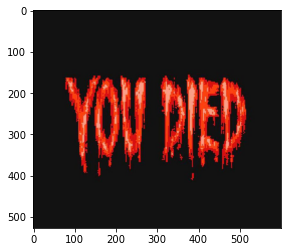

YOU DIED STUPID. PLEASE TRY AGAIN
You are now in game room
What would you like to do? Type 'explore' or 'examine'?explore
You explore the room. This is game room. You find couch, piano, door a
You are now in game room
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?couch
You find a map!
Populating the interactive namespace from numpy and matplotlib


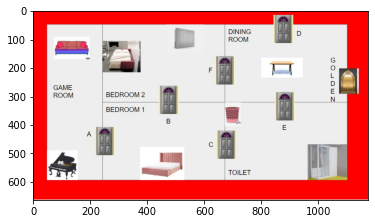

You examine couch. There isn't anything interesting about it.
You are now in game room


In [ ]:
game_state = INIT_GAME_STATE.copy()

start_game()


In [ ]:
sound_off()